In [2]:
import pandas as pd
import numpy as np
import os
xdata=pd.read_csv('Bootstrap2_feature_X.csv')
ydata=pd.read_csv('Bootstrap2_feature_Y.csv')

In [3]:
X_train = xdata.iloc[:4000,1:]
y_train = ydata.iloc[:4000,1:]

In [4]:
X_test = xdata.iloc[4000:4500,1:]
y_test = ydata.iloc[4000:4500,1:]

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [6]:
X_test = scaler.fit_transform(X_test)

In [7]:
from sklearn.svm import SVC
clf = SVC(C=2, gamma=1, probability=True,verbose=10) #这里采用kernel的默认值'rbf'，gamma是rbf的参数值
clf.fit(X_train,y_train)#输出概率

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[LibSVM]

SVC(C=2, gamma=1, probability=True, verbose=10)

In [8]:
clf.n_support_ #每一类中的支持向量个数

array([1107, 1322, 1058])

In [9]:
clf.support_ #支持向量的ID

array([   0,    2,    6, ..., 3991, 3992, 3996])

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


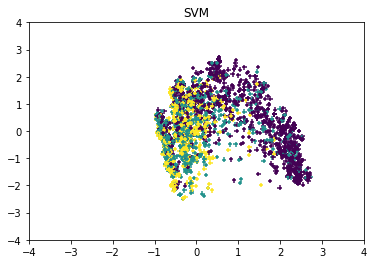

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
colorlabel = le.fit_transform(y_train)*100

#构造两个主成分，以实现可视化
pca = PCA(n_components=2, whiten=True) 
X_train_pca = pca.fit_transform(X_train)

plt.title("SVM")
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=colorlabel, s=20, marker="+")
plt.axis('tight')
plt.xlim((-4, 4))
plt.ylim((-4, 4))
plt.show() #可以看到，两个类别确实比较胶着，所有的观测都成为了支持向量

In [11]:
clf.support_vectors_ #每一个支持向量的X取值

array([[0.01857744, 0.13333333, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.17995162, 0.06666667, 0.16666667, ..., 0.        , 1.        ,
        0.        ],
       [0.60979613, 0.13333333, 0.07692308, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.80668721, 0.13333333, 0.25      , ..., 0.        , 1.        ,
        0.        ],
       [0.70024789, 0.06666667, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.37326764, 0.04444444, 0.125     , ..., 0.        , 1.        ,
        0.        ]])

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


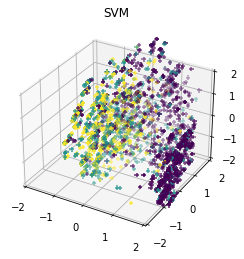

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
colorlabel = le.fit_transform(y_train) * 100

# Construct three principal components for visualization
pca = PCA(n_components=3, whiten=True)
X_train_pca = pca.fit_transform(X_train)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title("SVM")
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=colorlabel, s=20, marker="+")

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)

plt.show()


In [13]:
clf.fit_status_ #等于0表示全部分类正确，等于1表示有错分类

0

In [14]:
clf.dual_coef_ #拉格朗日乘子lambda的值乘以Y值（Y为正负1）

array([[ 0.78367129,  2.        ,  0.55762887, ..., -0.        ,
        -0.77853857, -2.        ],
       [ 0.        ,  0.        ,  0.        , ..., -2.        ,
        -0.        , -0.        ]])

In [15]:
#预测或拟合Y
pred = clf.predict(X_train)
pred

array([1, 2, 2, ..., 1, 1, 1], dtype=int64)

In [16]:
clf.decision_function(X_train) 
#这里的decision function 为讲义中的f(x)
#可以看出，上面pred的值就是根据decision function来判定的，若f(x)<0，就分类为'no'；若f(x)>0，就分类为'yes'

array([[ 2.23247551,  1.01577044, -0.23396857],
       [ 1.02492106,  2.21948613, -0.22254371],
       [ 1.16470224,  2.18618934, -0.23051792],
       ...,
       [ 2.22220753,  0.89802166, -0.20306476],
       [ 2.22223618,  0.88374247, -0.19809668],
       [ 2.22221113,  0.88071482, -0.19685658]])

In [17]:
#对各类别概率的预测，当前面的SVC()中设置了probability=True时才行，是通过5折交叉验证获得的
pred = clf.predict_proba(X_train)
pred #官网上也讲了，这个预测概率上面类别的预测结果pred可能会不一致
#由于使用了交叉验证，所以每次结果可能不同，需在SVC()中设置random_state才能保证各次结果保持不变

array([[0.81861007, 0.14084663, 0.04054331],
       [0.2148745 , 0.65640269, 0.12872281],
       [0.44831623, 0.46332769, 0.08835609],
       ...,
       [0.79304446, 0.13751431, 0.06944123],
       [0.79033596, 0.13748174, 0.0721823 ],
       [0.79033493, 0.13711122, 0.07255386]])

In [18]:
#SVC()无法获得变量重要性
#采用置换法获得变量重要性
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold
clf_importance = permutation_importance(clf, X_train, y_train, random_state=1, n_repeats=20)

In [19]:
clf_importance

{'importances_mean': array([ 1.01062500e-01,  2.87500000e-04,  1.41250000e-03, -5.75000000e-04,
        -7.50000000e-05,  3.96250000e-03,  2.01250000e-03, -1.87500000e-04,
         4.62500000e-04,  1.70625000e-02,  3.10000000e-02,  7.43750000e-03,
         5.91250000e-03,  1.18000000e-02,  8.26250000e-03,  4.00625000e-02,
         1.85375000e-02,  1.03375000e-02,  5.75000000e-04,  4.43750000e-03,
         4.30000000e-03,  2.15000000e-03,  2.58750000e-03,  1.46250000e-03,
         7.75000000e-04,  1.25000000e-05,  5.55111512e-18, -3.75000000e-05,
        -1.25000000e-05,  2.50000000e-05,  0.00000000e+00,  1.61250000e-03,
         7.83750000e-03,  1.93750000e-03,  6.35000000e-03,  1.75000000e-04,
        -3.75000000e-05,  1.03250000e-02,  3.47500000e-03,  3.31250000e-03,
         1.19250000e-02,  1.00625000e-02,  5.87500000e-04,  1.16375000e-02,
         5.50000000e-04,  6.37500000e-03,  6.72500000e-03,  8.00000000e-04,
         9.33750000e-03,  1.69875000e-02,  3.75000000e-04,  7.200000

Feature ranking:
1. feature 0 geo_index : 0.101063
2. feature 15 has_superstructure_timber : 0.040063
3. feature 10 has_superstructure_mud_mortar_stone : 0.031000
4. feature 16 has_superstructure_bamboo : 0.018538
5. feature 9 has_superstructure_adobe_mud : 0.017063
6. feature 49 other_floor_type_q : 0.016988
7. feature 40 roof_type_n : 0.011925
8. feature 13 has_superstructure_mud_mortar_brick : 0.011800
9. feature 43 ground_floor_type_f : 0.011638
10. feature 17 has_superstructure_rc_non_engineered : 0.010338
11. feature 37 foundation_type_r : 0.010325
12. feature 41 roof_type_q : 0.010063
13. feature 55 position_t : 0.009450
14. feature 48 other_floor_type_j : 0.009338
15. feature 14 has_superstructure_cement_mortar_brick : 0.008263
16. feature 32 land_surface_condition_n : 0.007838
17. feature 54 position_s : 0.007475
18. feature 11 has_superstructure_stone_flag : 0.007438
19. feature 51 other_floor_type_x : 0.007200
20. feature 46 ground_floor_type_x : 0.006725
21. feature 45 grou

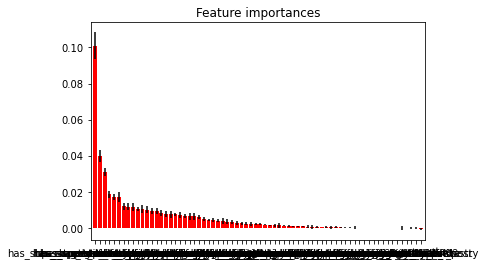

In [20]:
import matplotlib.pyplot as plt
importances = clf_importance.importances_mean
std = clf_importance.importances_std
indices = np.argsort(importances)[::-1]
feature_names = xdata.columns[1:]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d %s : %f" % (f + 1, indices[f], feature_names[indices[f]], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices])
plt.xlim([-1, X_train.shape[1]])
plt.show()
#从结果来看，与clf.coef_不完全吻合。

In [21]:
feature_names[indices[:15]]

Index(['geo_index', 'has_superstructure_timber',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_bamboo',
       'has_superstructure_adobe_mud', 'other_floor_type_q', 'roof_type_n',
       'has_superstructure_mud_mortar_brick', 'ground_floor_type_f',
       'has_superstructure_rc_non_engineered', 'foundation_type_r',
       'roof_type_q', 'position_t', 'other_floor_type_j',
       'has_superstructure_cement_mortar_brick'],
      dtype='object')

In [22]:
y_pred = clf.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) #预测的效果：R-squared

0.26249771374291253

In [23]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Classification accuracy:", accuracy)

Classification accuracy: 0.62


In [24]:
#reg.get_params().keys()

In [25]:
from sklearn.svm import SVC
reg = SVC(C=2, gamma=1)
from sklearn.model_selection import GridSearchCV, KFold
import random 
c = []
g = []
for i in range(-5, 16, 2):
    c.append(2**i)
for j in range(-15, 4, 2):
    g.append(2**j)
param_grid = [{'C': c, 'gamma': g}]
random.seed(1)
gs = GridSearchCV(estimator=reg,
                  
                  
                  param_grid=param_grid
                  
                  ,
                  scoring='r2',
                  cv=KFold(n_splits=10, random_state=1, shuffle=True))
gs = gs.fit(X_train, np.ravel(y_train))


In [26]:
gs.best_estimator_

SVC(C=32, gamma=0.03125)

In [27]:
xdata_imp = xdata[feature_names[indices[:15]]]

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(xdata.iloc[:40000,:])
y_train = ydata.iloc[:40000,1:]

In [29]:
X_test = scaler.fit_transform(xdata.iloc[40000:45000,:])
y_test = ydata.iloc[40000:45000,1:]

In [30]:
X_train

array([[0.05373991, 0.01844066, 0.07446809, ..., 0.        , 1.        ,
        0.        ],
       [0.37025756, 0.01071007, 0.05851064, ..., 0.        , 1.        ,
        0.        ],
       [0.67872115, 0.1786267 , 0.04255319, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.70591403, 0.01051462, 0.04255319, ..., 0.        , 1.        ,
        0.        ],
       [0.94953015, 0.8070929 , 0.05851064, ..., 0.        , 1.        ,
        0.        ],
       [0.94059091, 0.04032793, 0.05851064, ..., 0.        , 1.        ,
        0.        ]])

In [32]:
from sklearn.svm import SVC
clf = SVC(C=32, gamma=0.03125, probability=True,verbose=10) #这里采用kernel的默认值'rbf'，gamma是rbf的参数值
clf.fit(X_train,y_train)#输出概率

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[LibSVM]

SVC(C=32, gamma=0.03125, probability=True, verbose=10)

In [33]:
y_pred = clf.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) #预测的效果：R-squared

0.3874706677774502

In [34]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Classification accuracy:", accuracy)

Classification accuracy: 0.6684


In [35]:
sum(y_test.values.reshape(-1)==y_pred)/len(y_pred)

0.6684

In [36]:
from sklearn.svm import SVC
reg = SVC(C=2, gamma=1)
from sklearn.model_selection import GridSearchCV, KFold
import random 
#c = []
#g = []
k=['linear', 'poly', 'rbf', 'sigmoid']
#for i in range(-5, 16, 2):
#    c.append(2**i)
#for j in range(-15, 4, 2):
#    g.append(2**j)
param_grid = [{'C': c, 'gamma': g,'kernel':k}]
random.seed(1)
gs = GridSearchCV(estimator=reg,
                  param_grid=param_grid,
                  scoring='r2',
                  cv=KFold(n_splits=10, random_state=1, shuffle=True))
gs = gs.fit(X_train, np.ravel(y_train))

KeyboardInterrupt: 